# Part 1: Image denoising

The goal is to implement and evaluate image denoising methods.

During the lecture we have seen several filters that preserve edges while removing noise: 1) bilateral filtering, 2) non-local means filtering, 3) anisotropic diffusion, 4) the ROF model. We have also studied the deep image prior.

### Bilateral filter Implementation 

1. Implement a bilateral filter from scratch. Explore the influence of hyperparameters (window size etc...).
2. Apply it on a clean image (small size suggested!) with added gaussian noise
3. Compare to built-in functions in the cv2 library or others.
4. Compare to gaussian filter in terms of MSE, PSNR, SSIM

* #### Denefition: 
Le filtre bilatéral est un filtre non-linéaire utilisé pour **enlever le bruit** tout en **préservant les countours**

Contrairement au filtre **Gaussien** qui floute tout uniformement, ce filtre pèse les pixels selon :
* **Distance Spatial :** plus un pixel est loin et moins il compte
* **Différence d'intensité :** si l'intesité (couleur) est très différente, le pixel compte moins

Donc, on aura une fenêtre autour du pixel central, les pixels proches et de couleur proche auront un **poids élevé**, les autres ignorés

***Formule pour chaque pixel $I_(i,j)$ :***

$$
I_{\text{filtered}}(i,j) = 
\frac{\sum_{k,l} w_s(k,l) \cdot w_r(k,l) \cdot I(k,l)}
{\sum_{k,l} w_s(k,l) \cdot w_r(k,l)}
$$

où :
- $(i,j)$ : **coordonnées du pixel central** sur lequel on applique le filtre
- $(k,l)$ : **coordonnées autour du pixel central** (dans la fenêtre) => Pour chaque $(k,l)$, on regarde le pixel réel $(i+k, j+l)$

- $(w_s(k,l) = \exp\Big(-\frac{k^2 + l^2}{2 \sigma_s^2}\Big)$ est le **poids spatial** => Dépend de la distance entre $(i,j)$ et $(i+k; j+l)$ 
- $(w_r(k,l) = \exp\Big(-\frac{|I(k,l) - I(i,j)|^2}{2 \sigma_r^2}\Big)$ est le **poids d’intensité** => Dépend de la différence d'intensité entre $(i,j)$ et $(i+k, j+l)$


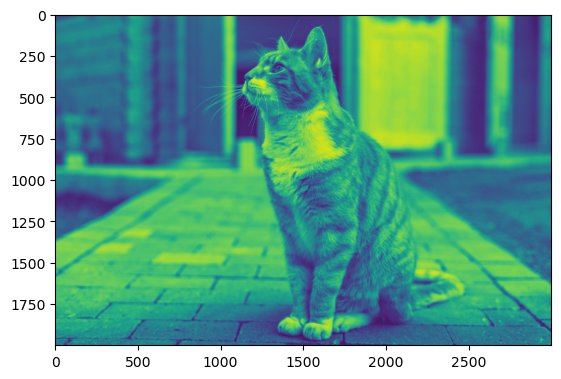

In [11]:
# preparer l'image

import cv2 
import numpy as np
import matplotlib.pyplot as plt

## charger l'image
img_ndg_1 = cv2.imread('imgs/high-resolution/cat4.jpeg', cv2.IMREAD_GRAYSCALE)
plt.imshow(img_ndg_1)

### Anisotropic diffusion

 Implement isotropic and anisotropic diffusion from scratch, and explore the hyperparameter value (lambda)

### Deep Image Prior (DIP)

Run and test the deep image prior method:
* https://github.com/DmitryUlyanov/deep-image-prior
* https://colab.research.google.com/github/DmitryUlyanov/deep-image-prior/blob/master/denoising.ipynb